<a href="https://colab.research.google.com/github/RaisJaya/AnalysisShrimpFarming/blob/main/Shrimp_farming_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analyst Test -  JALA TECH**

###*Shrimp farming Analysis*

*Load Library*

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving harvests.csv to harvests.csv


In [ ]:
df_m = pd.read_csv(io.BytesIO(data_to_load['measurements.csv']))
df_m.head()

,pond_id,cycle_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,35456,23531,2022-09-27,27.5,NaN,3.4,NaN,31.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37074,15493,2023-03-02,29.2,28.6,NaN,NaN,15.0,15.0,7.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32638,15498,2022-06-07,27.0,29.0,NaN,NaN,31.0,31.0,8.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18212,16294,2022-10-19,25.3,27.1,12.5,17.4,13.0,13.0,7.90,...,NaN,1.313,70.0,4643.0,595.0,4048.0,NaN,70.0,175.0,NaN
4,30607,20429,2022-04-04,28.7,31.1,4.9,NaN,NaN,NaN,8.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Handling Missing Value*

In [ ]:
df_m.shape

(37909, 24)

In [ ]:
df_m.isna()

,pond_id,cycle_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,False,False,False,False,True,False,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
4,False,False,False,False,False,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37904,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
37905,False,False,False,False,False,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
37906,False,False,False,False,True,True,True,False,True,False,...,True,True,True,True,True,True,True,True,True,True
37907,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
df_m.isna().sum()

pond_id                    0
cycle_id                   0
measured_date              0
morning_temperature     6753
evening_temperature     8468
morning_do             13956
evening_do             14776
morning_salinity        9710
evening_salinity       19710
morning_pH              3405
evening_pH             18652
transparency           11506
turbidity              37892
ammonia                36463
nitrate                37285
nitrite                34426
alkalinity             33604
hardness               35607
calcium                35262
magnesium              35257
carbonate              35944
bicarbonate            35529
tom                    35679
total_plankton_        33816
dtype: int64

In [ ]:
df_m.drop("turbidity", axis=1, inplace=True)


,pond_id,cycle_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,35456,23531,2022-09-27,27.5,NaN,3.4,NaN,31.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37074,15493,2023-03-02,29.2,28.6,NaN,NaN,15.0,15.0,7.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32638,15498,2022-06-07,27.0,29.0,NaN,NaN,31.0,31.0,8.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18212,16294,2022-10-19,25.3,27.1,12.5,17.4,13.0,13.0,7.90,...,NaN,1.313,70.0,4643.0,595.0,4048.0,NaN,70.0,175.0,NaN
4,30607,20429,2022-04-04,28.7,31.1,4.9,NaN,NaN,NaN,8.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_m.drop(["nitrate", "ammonia"], axis=1, inplace=True)
df_m.head()

,pond_id,cycle_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,...,transparency,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,35456,23531,2022-09-27,27.5,NaN,3.4,NaN,31.0,NaN,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37074,15493,2023-03-02,29.2,28.6,NaN,NaN,15.0,15.0,7.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32638,15498,2022-06-07,27.0,29.0,NaN,NaN,31.0,31.0,8.10,...,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18212,16294,2022-10-19,25.3,27.1,12.5,17.4,13.0,13.0,7.90,...,40.0,1.313,70.0,4643.0,595.0,4048.0,NaN,70.0,175.0,NaN
4,30607,20429,2022-04-04,28.7,31.1,4.9,NaN,NaN,NaN,8.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
avg_mt = df_m['morning_temperature'].mean()
avg_et = df_m['evening_temperature'].mean()
avg_md = df_m['morning_do'].mean()
avg_ed = df_m['evening_do'].mean()
avg_ms = df_m['morning_salinity'].mean()
avg_es = df_m['evening_salinity'].mean()
avg_mp = df_m['morning_pH'].mean()
avg_ep = df_m['evening_pH'].mean()
avg_tr = df_m['transparency'].mean()
avg_nt = df_m['nitrite'].mean()
avg_al = df_m['alkalinity'].mean()
avg_hd = df_m['hardness'].mean()
avg_cl = df_m['calcium'].mean()
avg_mg = df_m['magnesium'].mean()
avg_co = df_m['carbonate'].mean()
avg_bc = df_m['bicarbonate'].mean()
avg_tm = df_m['tom'].mean()
avg_tp = df_m['total_plankton_'].mean()

In [ ]:
df_m['morning_temperature'] = df_m['morning_temperature'].fillna(avg_mt)
df_m['evening_temperature'] = df_m['evening_temperature'].fillna(avg_et)
df_m['morning_do'] = df_m['morning_do'].fillna(avg_md)
df_m['evening_do'] = df_m['evening_do'].fillna(avg_ed)
df_m['morning_salinity'] = df_m['morning_salinity'].fillna(avg_ms)
df_m['evening_salinity'] = df_m['evening_salinity'].fillna(avg_es)
df_m['morning_pH'] = df_m['morning_pH'].fillna(avg_mp)
df_m['evening_pH'] = df_m['evening_pH'].fillna(avg_ep)
df_m['transparency'] = df_m['transparency'].fillna(avg_tr)
df_m['nitrite'] = df_m['nitrite'].fillna(avg_nt)
df_m['alkalinity'] = df_m['alkalinity'].fillna(avg_al)
df_m['hardness'] = df_m['hardness'].fillna(avg_hd)
df_m['calcium'] = df_m['calcium'].fillna(avg_cl)
df_m['magnesium'] = df_m['magnesium'].fillna(avg_mg)
df_m['carbonate'] = df_m['carbonate'].fillna(avg_co)
df_m['bicarbonate'] = df_m['bicarbonate'].fillna(avg_bc)
df_m['tom'] = df_m['tom'].fillna(avg_tm)
df_m['total_plankton_'] = df_m['total_plankton_'].fillna(avg_tp)

In [ ]:
df_m.head()

,pond_id,cycle_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,...,transparency,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,tom,total_plankton_
0,35456,23531,2022-09-27,27.5,29.645996,3.400000,5.821614,31.000000,19.731211,8.12973,...,50.000000,31.036124,140.042983,5380.612038,490.913348,1626.97714,14.971883,129.401034,90.935785,610321.83718
1,37074,15493,2023-03-02,29.2,28.600000,5.352111,5.821614,15.000000,15.000000,7.87000,...,43.313508,31.036124,140.042983,5380.612038,490.913348,1626.97714,14.971883,129.401034,90.935785,610321.83718
2,32638,15498,2022-06-07,27.0,29.000000,5.352111,5.821614,31.000000,31.000000,8.10000,...,95.000000,31.036124,140.042983,5380.612038,490.913348,1626.97714,14.971883,129.401034,90.935785,610321.83718
3,18212,16294,2022-10-19,25.3,27.100000,12.500000,17.400000,13.000000,13.000000,7.90000,...,40.000000,1.313000,70.000000,4643.000000,595.000000,4048.00000,14.971883,70.000000,175.000000,610321.83718
4,30607,20429,2022-04-04,28.7,31.100000,4.900000,5.821614,22.008151,19.731211,8.23000,...,43.313508,31.036124,140.042983,5380.612038,490.913348,1626.97714,14.971883,129.401034,90.935785,610321.83718


#Dataset Harvest

In [ ]:
df_h = pd.read_csv(io.BytesIO(data_to_load['harvests.csv']))
df_h.head()

,cycle_id,size,weight,id,harvested_at,status
0,15308,119.78,481.20,15542,1/3/2023,Partial
1,15308,119.78,65.54,15543,1/3/2023,Partial
2,15308,63.42,111.66,15919,1/21/2023,Partial
3,15308,113.57,180.09,15920,1/21/2023,Partial
4,15308,113.57,346.57,15921,1/21/2023,Partial


In [ ]:
df_h.isna().sum()

cycle_id         0
size             0
weight           0
id               0
harvested_at     0
status          49
dtype: int64

In [ ]:
df_h1 = df_h.dropna()

In [ ]:
df_h1.isna().sum()

cycle_id        0
size            0
weight          0
id              0
harvested_at    0
status          0
dtype: int64

In [ ]:
df_h1.head()

,cycle_id,size,weight,id,harvested_at,status
0,15308,119.78,481.20,15542,1/3/2023,Partial
1,15308,119.78,65.54,15543,1/3/2023,Partial
2,15308,63.42,111.66,15919,1/21/2023,Partial
3,15308,113.57,180.09,15920,1/21/2023,Partial
4,15308,113.57,346.57,15921,1/21/2023,Partial


#Merge Dataset -> Right Join

In [ ]:
df_merge = pd.merge(df_m,df_h1, on = "cycle_id", how='right')

In [ ]:
df_merge.head()

,pond_id,cycle_id,measured_date,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,morning_pH,...,magnesium,carbonate,bicarbonate,tom,total_plankton_,size,weight,id,harvested_at,status
0,31460,15308,2022-11-19,27.4,29.0,6.098000,5.821614,29.838,19.731211,8.387,...,1626.97714,14.971883,129.401034,90.935785,610321.83718,119.78,481.2,15542,1/3/2023,Partial
1,31460,15308,2022-11-01,27.0,29.0,5.352111,5.821614,30.000,19.731211,8.700,...,1176.00000,24.000000,72.000000,74.000000,90000.00000,119.78,481.2,15542,1/3/2023,Partial
2,31460,15308,2023-01-16,27.0,30.0,5.352111,5.821614,21.000,19.731211,7.900,...,1626.97714,14.971883,129.401034,90.935785,610321.83718,119.78,481.2,15542,1/3/2023,Partial
3,31460,15308,2023-01-28,26.0,27.0,5.352111,5.821614,19.000,19.731211,7.700,...,1626.97714,14.971883,129.401034,90.935785,610321.83718,119.78,481.2,15542,1/3/2023,Partial
4,31460,15308,2022-12-12,27.0,30.0,5.352111,5.821614,27.000,19.731211,7.700,...,1626.97714,14.971883,129.401034,90.935785,610321.83718,119.78,481.2,15542,1/3/2023,Partial


In [ ]:
df_merge.isna().sum()

pond_id                0
cycle_id               0
measured_date          0
morning_temperature    0
evening_temperature    0
morning_do             0
evening_do             0
morning_salinity       0
evening_salinity       0
morning_pH             0
evening_pH             0
transparency           0
nitrite                0
alkalinity             0
hardness               0
calcium                0
magnesium              0
carbonate              0
bicarbonate            0
tom                    0
total_plankton_        0
size                   0
weight                 0
id                     0
harvested_at           0
status                 0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x200 with 0 Axes>

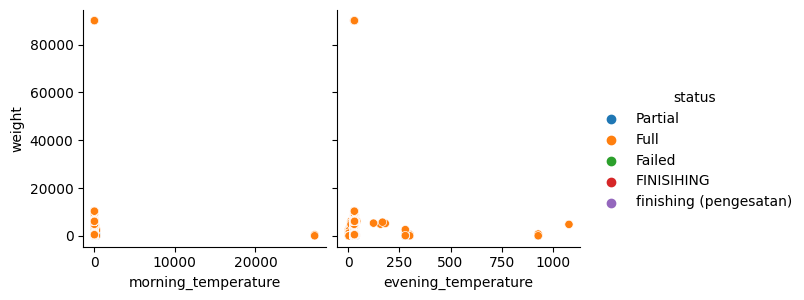

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,2))
sns.pairplot(data=df_merge, x_vars=['morning_temperature','evening_temperature'], y_vars=['weight'], size=3, hue="status")
plt.show()
plt.savefig('temp.png')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x200 with 0 Axes>

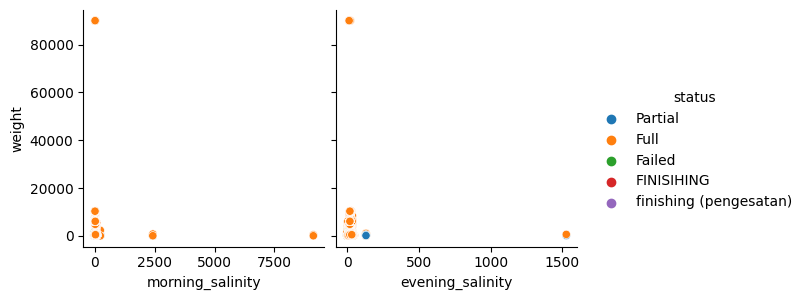

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,2))
sns.pairplot(data=df_merge, x_vars=['morning_salinity','evening_salinity'], y_vars=['weight'], size=3, hue="status")
plt.show()
plt.savefig('salinity.png')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x200 with 0 Axes>

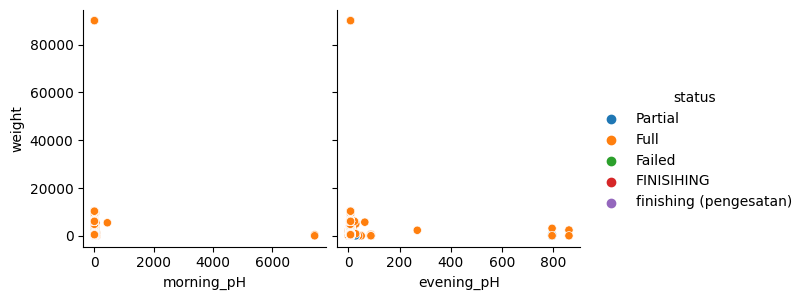

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,2))
sns.pairplot(data=df_merge, x_vars=['morning_pH','evening_pH'], y_vars=['weight'], size=3, hue="status")
plt.show()
plt.savefig('pH.png')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x200 with 0 Axes>

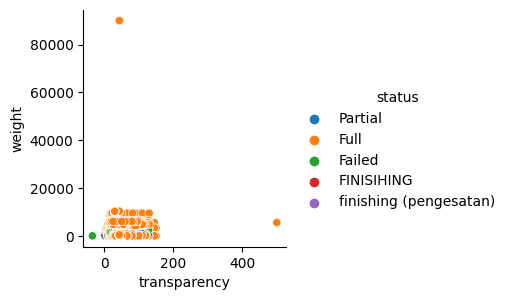

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,2))
ax = sns.pairplot(data=df_merge, x_vars=['transparency'], y_vars=['weight'], size=3, hue="status")
plt.show()
plt.savefig('transparency.png')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x200 with 0 Axes>

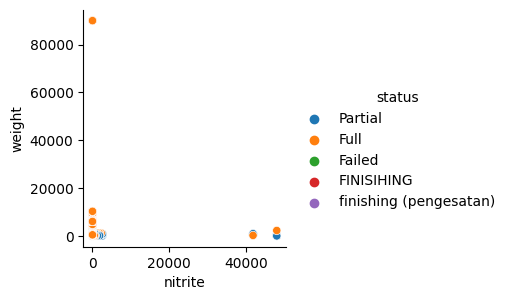

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,2))
ax = sns.pairplot(data=df_merge, x_vars=['nitrite'], y_vars=['weight'], size=3, hue="status")
plt.show()
plt.savefig('nitrite.png')